In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\Membro\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [7]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [8]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [9]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


[Text(465.0, 755.0, 'preco <= 59982.246\ngini = 0.487\nsamples = 10000\nvalue = [4200, 5800]\nclass = sim'),
 Text(232.5, 453.0, 'preco <= 40083.385\ngini = 0.198\nsamples = 4347\nvalue = [484, 3863]\nclass = sim'),
 Text(116.25, 151.0, 'gini = 0.0\nsamples = 1935\nvalue = [0, 1935]\nclass = sim'),
 Text(348.75, 151.0, 'gini = 0.321\nsamples = 2412\nvalue = [484, 1928]\nclass = sim'),
 Text(697.5, 453.0, 'km_por_ano <= 24124.006\ngini = 0.45\nsamples = 5653\nvalue = [3716, 1937]\nclass = não'),
 Text(581.25, 151.0, 'gini = 0.498\nsamples = 3513\nvalue = [1879, 1634]\nclass = não'),
 Text(813.75, 151.0, 'gini = 0.243\nsamples = 2140\nvalue = [1837, 303]\nclass = não')]

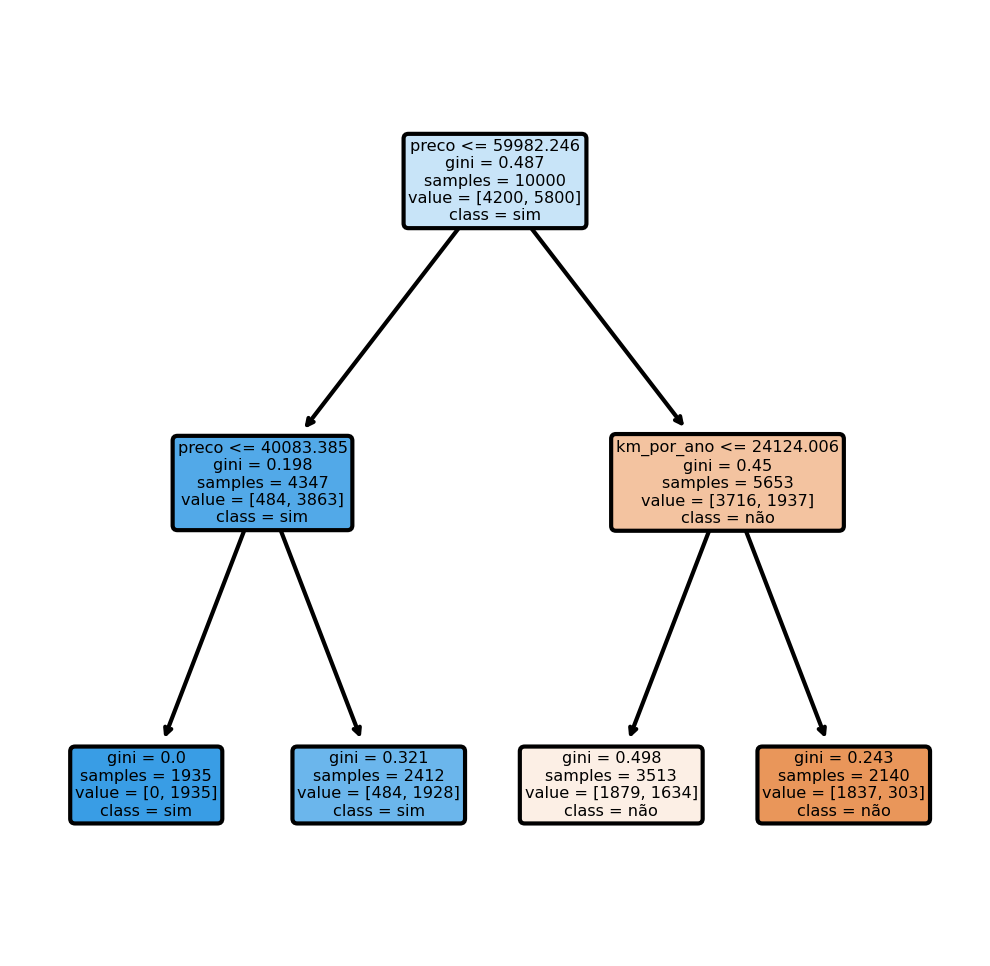

In [10]:
from sklearn.tree import plot_tree

modelo.fit(x_azar,y_azar)
features=x_azar.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(modelo,class_names=['não','sim'],rounded=True,filled=True,feature_names=features)

In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


[Text(393.46153846153845, 792.75, 'preco <= 59982.246\ngini = 0.487\nsamples = 10000\nvalue = [4200, 5800]\nclass = sim'),
 Text(143.07692307692307, 566.25, 'preco <= 40083.385\ngini = 0.198\nsamples = 4347\nvalue = [484, 3863]\nclass = sim'),
 Text(71.53846153846153, 339.75, 'gini = 0.0\nsamples = 1935\nvalue = [0, 1935]\nclass = sim'),
 Text(214.61538461538458, 339.75, 'preco <= 41083.029\ngini = 0.321\nsamples = 2412\nvalue = [484, 1928]\nclass = sim'),
 Text(143.07692307692307, 113.25, 'gini = 0.434\nsamples = 110\nvalue = [35, 75]\nclass = sim'),
 Text(286.15384615384613, 113.25, 'gini = 0.314\nsamples = 2302\nvalue = [449, 1853]\nclass = sim'),
 Text(643.8461538461538, 566.25, 'km_por_ano <= 24124.006\ngini = 0.45\nsamples = 5653\nvalue = [3716, 1937]\nclass = não'),
 Text(500.7692307692307, 339.75, 'preco <= 99974.41\ngini = 0.498\nsamples = 3513\nvalue = [1879, 1634]\nclass = não'),
 Text(429.23076923076917, 113.25, 'gini = 0.49\nsamples = 2944\nvalue = [1682, 1262]\nclass = nã

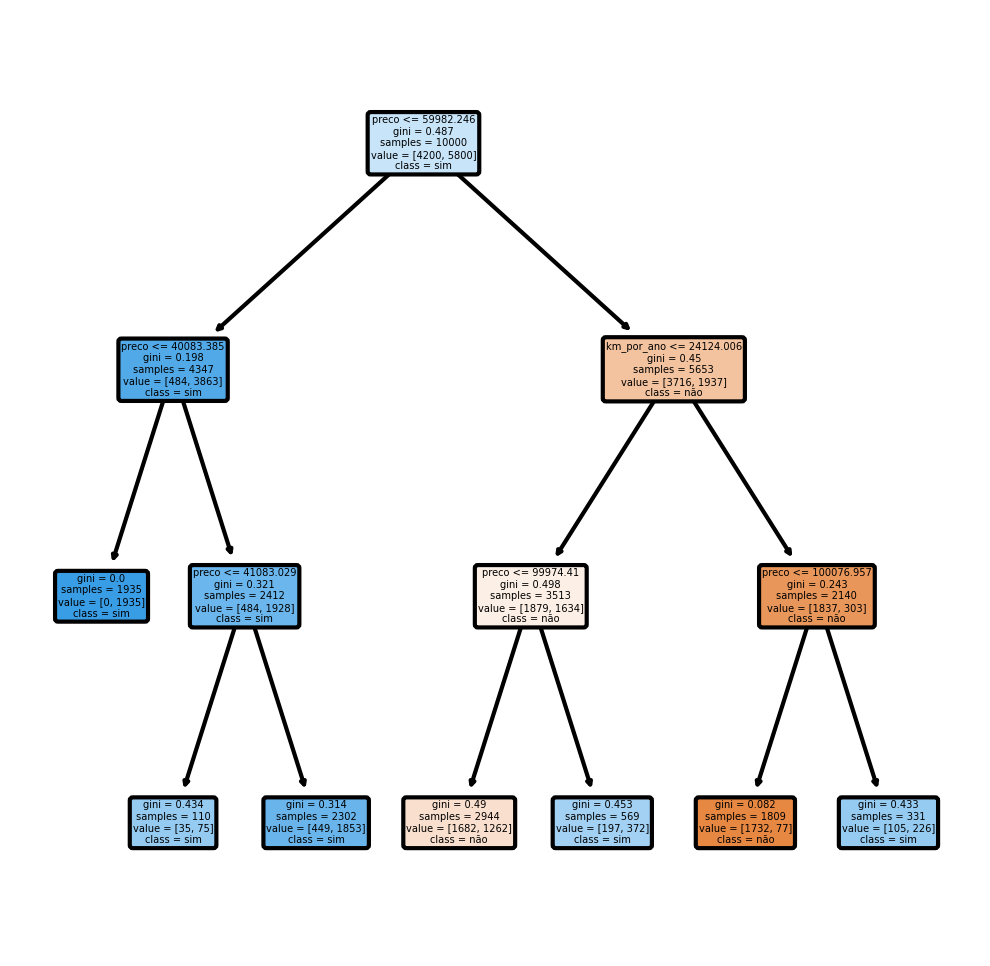

In [12]:
from sklearn.tree import plot_tree

modelo.fit(x_azar,y_azar)
features=x_azar.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(modelo,class_names=['não','sim'],rounded=True,filled=True,feature_names=features)

In [13]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score=results['train_score'].mean() * 100
    test_score=results['test_score'].mean() * 100
    print("max_depth = %d, media treino =%.2f, media teste =%.2f" % (max_depth,train_score ,test_score))
    tabela=[max_depth,train_score,test_score]
    return tabela

In [14]:
resultados=[roda_arvore_de_decisao(i) for i in range(1,33)]
resultados=pd.DataFrame(resultados,columns=['max_depth','train_score','test_score'])
resultados.head()

max_depth = 1, media treino =75.79, media teste =75.78
max_depth = 2, media treino =75.79, media teste =75.78
max_depth = 3, media treino =78.75, media teste =78.67
max_depth = 4, media treino =78.79, media teste =78.63
max_depth = 5, media treino =78.94, media teste =78.56
max_depth = 6, media treino =79.17, media teste =78.12
max_depth = 7, media treino =79.50, media teste =77.96
max_depth = 8, media treino =79.89, media teste =77.86
max_depth = 9, media treino =80.46, media teste =77.38
max_depth = 10, media treino =81.16, media teste =77.19
max_depth = 11, media treino =82.03, media teste =76.97
max_depth = 12, media treino =82.89, media teste =76.49
max_depth = 13, media treino =83.95, media teste =75.81
max_depth = 14, media treino =85.03, media teste =75.66
max_depth = 15, media treino =86.14, media teste =75.16
max_depth = 16, media treino =87.19, media teste =75.11
max_depth = 17, media treino =88.31, media teste =74.74
max_depth = 18, media treino =89.26, media teste =74.33
m

,max_depth,train_score,test_score
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


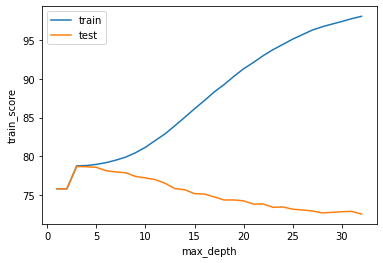

In [15]:
sns.lineplot(x='max_depth',y='train_score',data=resultados,label='train')
sns.lineplot(x='max_depth',y='test_score',data=resultados,label='test')
plt.legend()

In [16]:
resultados.sort_values(by='test_score',ascending=False).head()

,max_depth,train_score,test_score
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


In [17]:
def roda_arvore_de_decisao(max_depth,min_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score=results['train_score'].mean() * 100
    test_score=results['test_score'].mean() * 100
    print("max_depth = %d, min leaf = %d, media treino =%.2f, media teste =%.2f" % (max_depth,min_leaf,train_score ,test_score))
    tabela=[max_depth,min_leaf,train_score,test_score]
    return tabela

In [18]:
def busca():
    resultados=[]
    for i in range(1,33):
        for j in [32,64,128,256]:
            tabela=roda_arvore_de_decisao(i,j)
            resultados.append(tabela)
    resultados=pd.DataFrame(resultados,columns=['max_depth','min_samples_leaf','train','test'])
    return resultados



In [19]:
resultados=busca()
resultados.head()

max_depth = 1, min leaf = 32, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 64, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 128, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 256, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 32, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 64, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 128, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 256, media treino =75.79, media teste =75.78
max_depth = 3, min leaf = 32, media treino =78.75, media teste =78.67
max_depth = 3, min leaf = 64, media treino =78.75, media teste =78.67
max_depth = 3, min leaf = 128, media treino =78.75, media teste =78.67
max_depth = 3, min leaf = 256, media treino =78.75, media teste =78.67
max_depth = 4, min leaf = 32, media treino =78.75, media teste =78.67
max_depth = 4, min leaf = 64, media treino =78.75, media teste =78.67
max_depth = 4,

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [20]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [21]:
resultados.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


<AxesSubplot:>

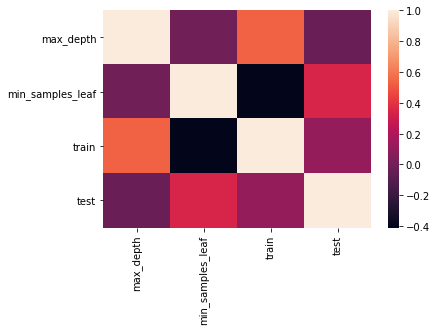

In [22]:
sns.heatmap(resultados.corr())

array([[<AxesSubplot:xlabel='max_depth', ylabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>,
        <AxesSubplot:xlabel='train', ylabel='max_depth'>,
        <AxesSubplot:xlabel='test', ylabel='max_depth'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='train', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='test', ylabel='min_samples_leaf'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='train'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='train'>,
        <AxesSubplot:xlabel='train', ylabel='train'>,
        <AxesSubplot:xlabel='test', ylabel='train'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='test'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='test'>,
        <AxesSubplot:xlabel='train', ylabel='test'>,
        <AxesSubplot:xlabel='test', ylabel='test'>]], dtype=object)

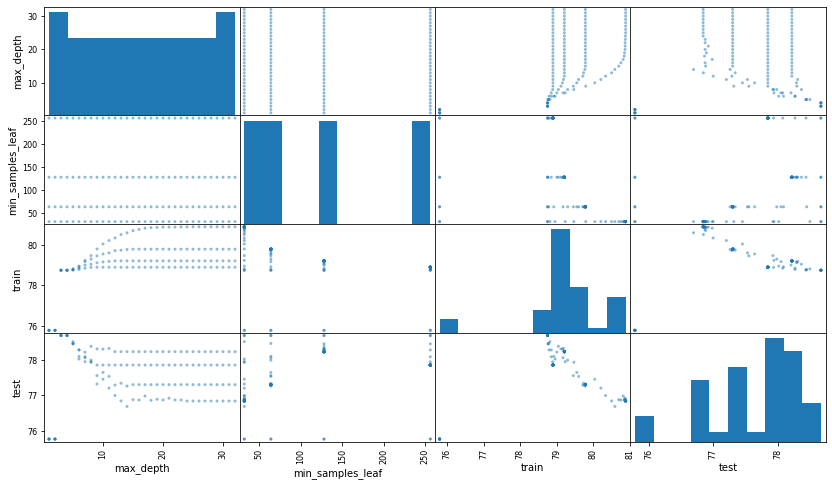

In [23]:
pd.plotting.scatter_matrix(resultados,figsize=(14,8))

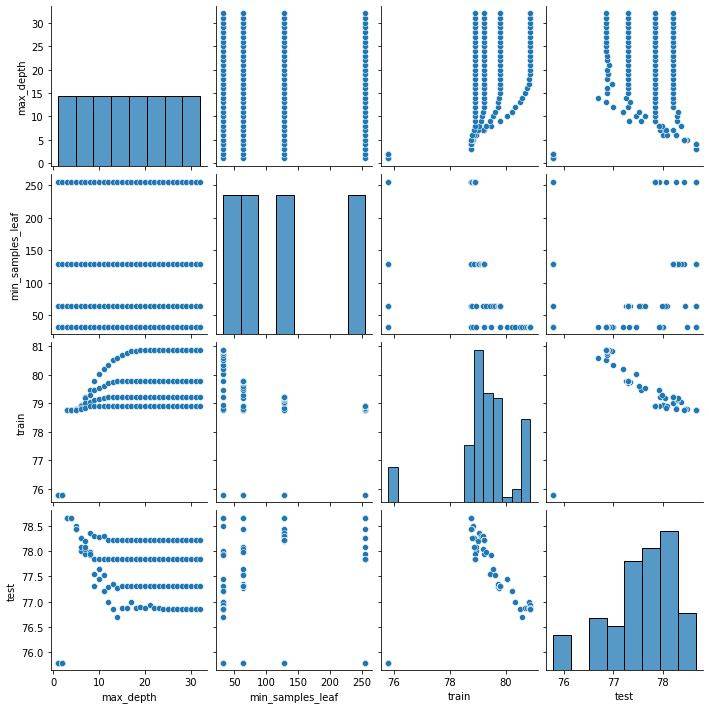

In [24]:
sns.pairplot(resultados)

<AxesSubplot:>

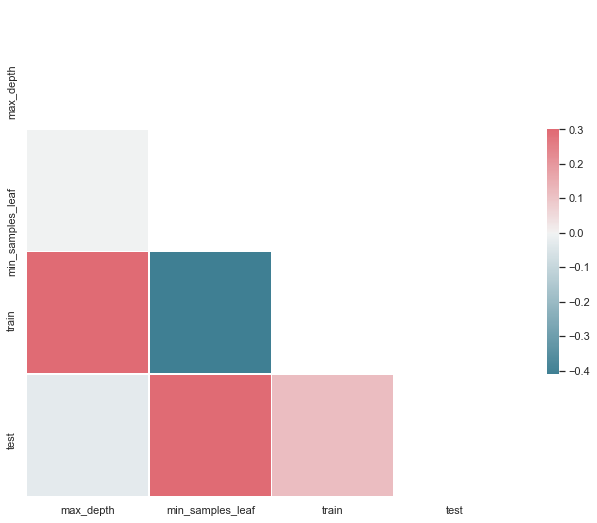

In [25]:
sns.set(style="white")

corr=resultados.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
def busca():
    resultados=[]
    for i in range(1,33):
        for j in [128,256,512,2014]:
            tabela=roda_arvore_de_decisao(i,j)
            resultados.append(tabela)
    resultados=pd.DataFrame(resultados,columns=['max_depth','min_samples_leaf','train','test'])
    return resultados

resultados=busca()
resultados.head()

max_depth = 1, min leaf = 128, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 256, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 512, media treino =75.79, media teste =75.78
max_depth = 1, min leaf = 2014, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 128, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 256, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 512, media treino =75.79, media teste =75.78
max_depth = 2, min leaf = 2014, media treino =75.79, media teste =75.78
max_depth = 3, min leaf = 128, media treino =78.75, media teste =78.67
max_depth = 3, min leaf = 256, media treino =78.75, media teste =78.67
max_depth = 3, min leaf = 512, media treino =77.53, media teste =77.50
max_depth = 3, min leaf = 2014, media treino =75.79, media teste =75.78
max_depth = 4, min leaf = 128, media treino =78.75, media teste =78.67
max_depth = 4, min leaf = 256, media treino =78.75, media teste =78.67
max

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,256,75.791169,75.784219
2,1,512,75.791169,75.784219
3,1,2014,75.791169,75.784219
4,2,128,75.791169,75.784219


<AxesSubplot:>

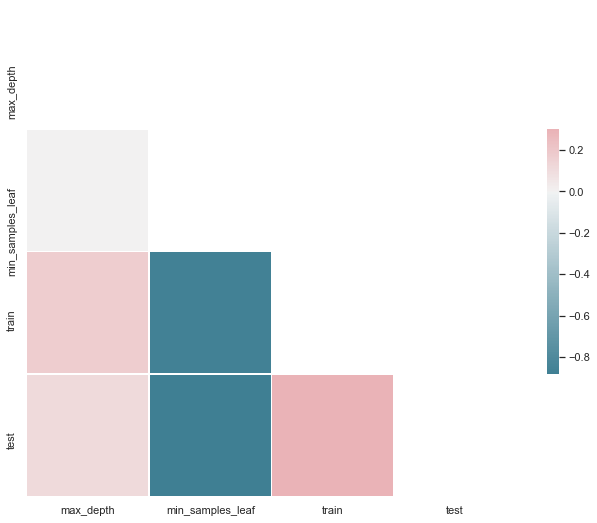

In [27]:
sns.set(style="white")

corr=resultados.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
8,3,128,78.750993,78.672633
13,4,256,78.750993,78.672633
12,4,128,78.750993,78.672633
9,3,256,78.750993,78.672633
17,5,256,78.765499,78.441275


In [40]:
def roda_arvore_de_decisao(max_depth,min_leaf,min_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_leaf,min_samples_split=min_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score=results['train_score'].mean() * 100
    test_score=results['test_score'].mean() * 100
    fit_time=results['fit_time'].mean()
    score_time=results['score_time'].mean()
    # print("max_depth = %d, min leaf = %d, min split = %.2f" %(max_depth,min_leaf,min_split))
    tabela=[max_depth,min_leaf,min_split,train_score,test_score,fit_time,score_time]
    return tabela


In [41]:
def busca():
    resultados=[]
    for i in range(1,33):
        for j in [128,256,512,2014]:
            for k in [32,128,256,512]:
                tabela=roda_arvore_de_decisao(i,j,k)
                resultados.append(tabela)
    resultados=pd.DataFrame(resultados,columns=['max_depth','min_samples_leaf','min_samples_split','train','test','fit_time','score_time'])
    return resultados

resultados=busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.005205,0.001842
1,1,128,128,75.791169,75.784219,0.004797,0.001499
2,1,128,256,75.791169,75.784219,0.004788,0.001616
3,1,128,512,75.791169,75.784219,0.004808,0.001696
4,1,256,32,75.791169,75.784219,0.004715,0.001490


In [42]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
33,3,128,128,78.750993,78.672633,0.008525,0.001607
32,3,128,32,78.750993,78.672633,0.008795,0.001507
34,3,128,256,78.750993,78.672633,0.008320,0.001877
35,3,128,512,78.750993,78.672633,0.008803,0.001809
36,3,256,32,78.750993,78.672633,0.008920,0.001607


<AxesSubplot:>

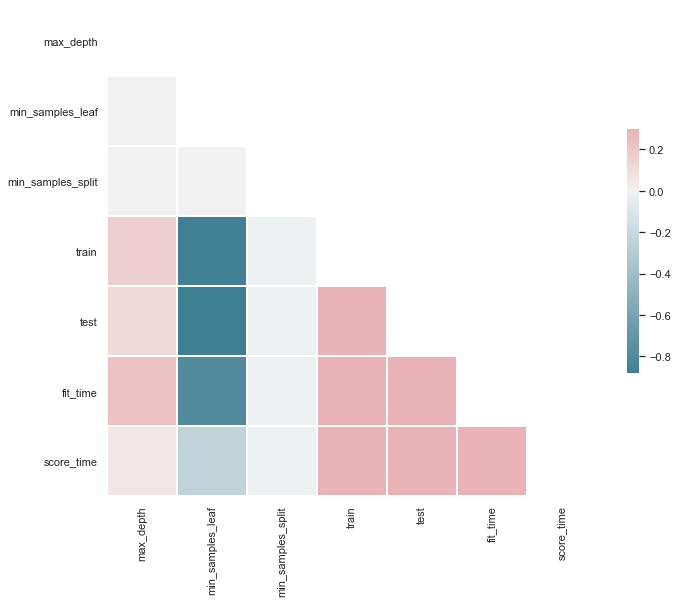

In [43]:
sns.set(style="white")

corr=resultados.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5],
    'min_samples_leaf':[32,64,128],
    'min_samples_split':[32,64,128],
    'criterion': ['gini','entropy']
    
}

busca=GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv=GroupKFold(n_splits=10)
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009453,0.000965,0.001900,0.000299,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.009003,0.000448,0.001997,0.000448,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.008799,0.000400,0.001601,0.000490,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.008851,0.000454,0.001507,0.000500,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.008806,0.000403,0.001788,0.000394,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [46]:
print(busca.best_params_)
print(busca.best_score_*100)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [47]:
melhor=busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [53]:
from sklearn.metrics import accuracy_score

#evitar essa abordagem,  otimista
predicoes=melhor.predict(x_azar)
acuracia=accuracy_score(predicoes,y_azar)
print('a acuracia foi de %.2f %%' % (acuracia*100))

a acuracia foi de 78.75 %


In [58]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(busca,x_azar,y_azar,cv=GroupKFold(n_splits=10),groups=dados.modelo)
scores

##bugadao

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5],
    'min_samples_leaf':[32,64,128],
    'min_samples_split':[32,64,128],
    'criterion': ['gini','entropy']
    
}

busca=GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=10,shuffle=True)
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008823,0.000439,0.001685,0.000454,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.008701,0.000469,0.001496,0.000504,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.008698,0.000458,0.001602,0.000490,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.008508,0.000509,0.001501,0.000500,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.008699,0.000459,0.001501,0.000500,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1


In [63]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [65]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(busca,x_azar,y_azar,cv=KFold(n_splits=10,shuffle=True))
scores

array([0.798, 0.753, 0.785, 0.784, 0.806, 0.779, 0.792, 0.807, 0.767,
       0.798])

In [66]:
imprime_score(scores)

Accuracy médio 78.69
Intervalo [75.43, 81.95]


In [67]:
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

[Text(983.6538461538461, 1981.875, 'preco <= 59982.246\ngini = 0.487\nsamples = 10000\nvalue = [4200, 5800]\nclass = sim'),
 Text(357.6923076923077, 1415.625, 'preco <= 40083.385\ngini = 0.198\nsamples = 4347\nvalue = [484, 3863]\nclass = sim'),
 Text(178.84615384615384, 849.375, 'gini = 0.0\nsamples = 1935\nvalue = [0, 1935]\nclass = sim'),
 Text(536.5384615384615, 849.375, 'preco <= 41083.029\ngini = 0.321\nsamples = 2412\nvalue = [484, 1928]\nclass = sim'),
 Text(357.6923076923077, 283.125, 'gini = 0.434\nsamples = 110\nvalue = [35, 75]\nclass = sim'),
 Text(715.3846153846154, 283.125, 'gini = 0.314\nsamples = 2302\nvalue = [449, 1853]\nclass = sim'),
 Text(1609.6153846153845, 1415.625, 'km_por_ano <= 24124.006\ngini = 0.45\nsamples = 5653\nvalue = [3716, 1937]\nclass = não'),
 Text(1251.923076923077, 849.375, 'preco <= 99974.41\ngini = 0.498\nsamples = 3513\nvalue = [1879, 1634]\nclass = não'),
 Text(1073.076923076923, 283.125, 'gini = 0.49\nsamples = 2944\nvalue = [1682, 1262]\ncl

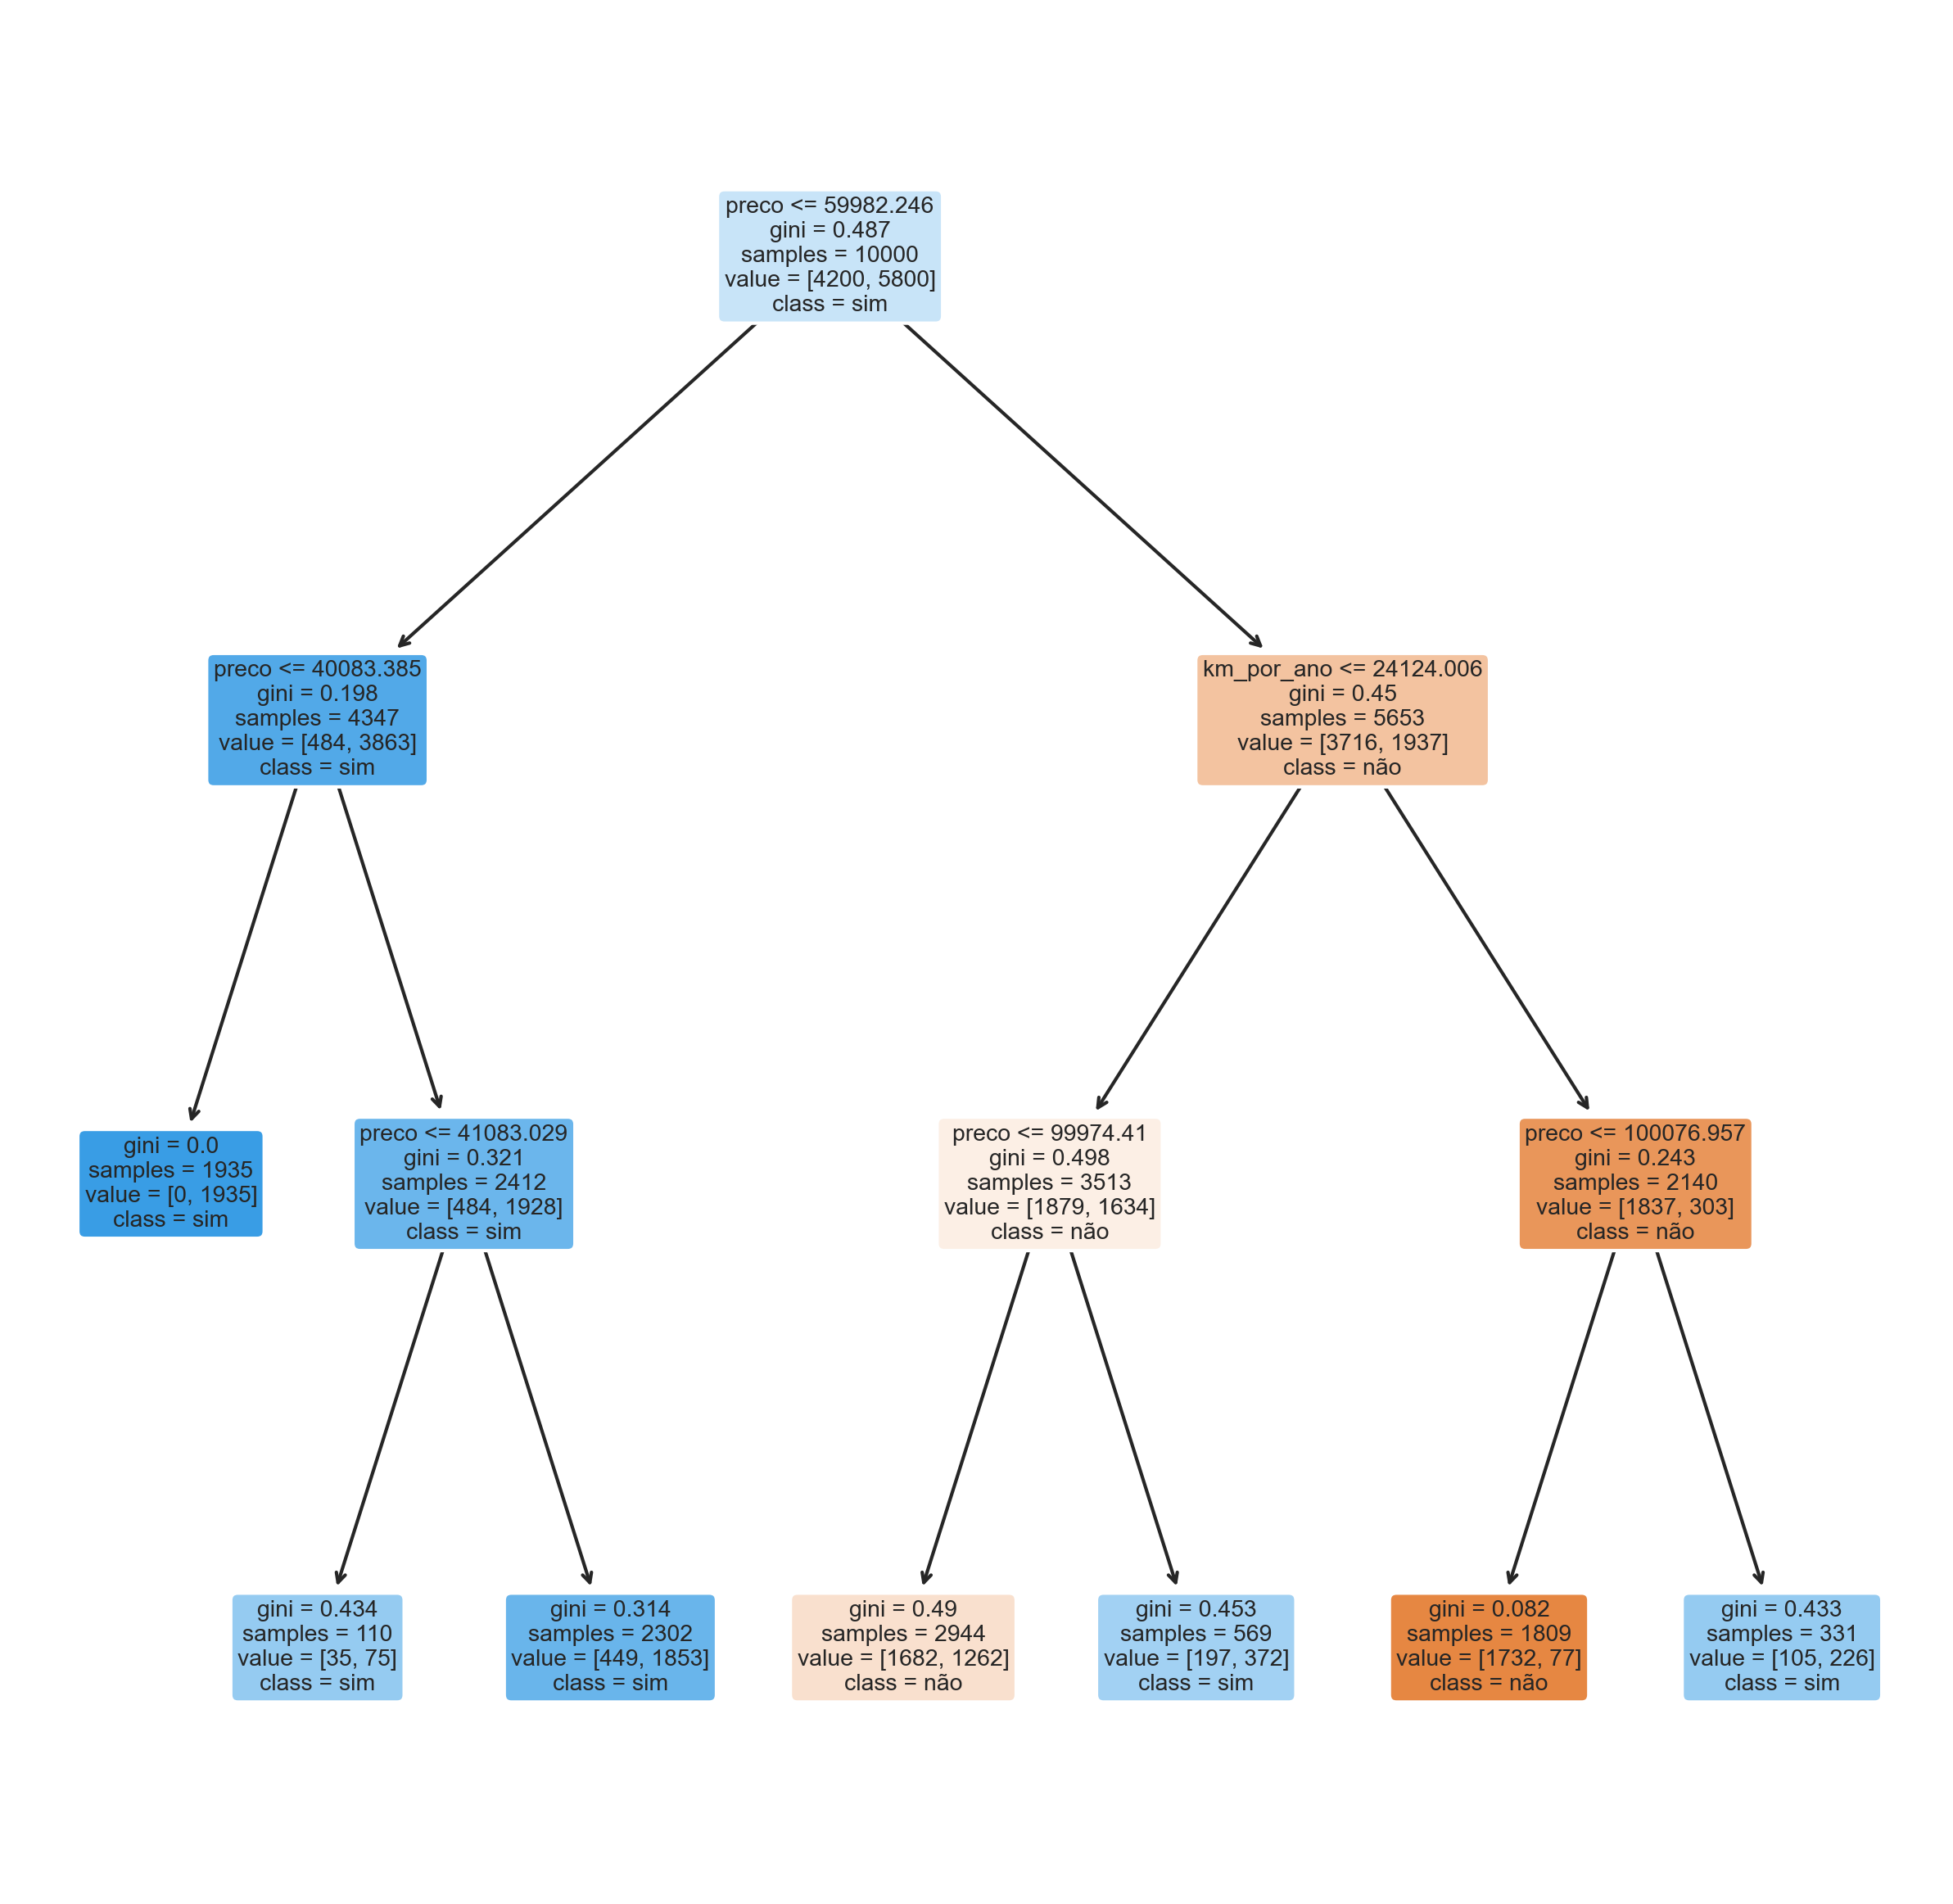

In [68]:
fig,ax=plt.subplots(figsize=(10,10),dpi=300)

plot_tree(melhor,class_names=['não','sim'],rounded=True,filled=True,feature_names=features)


### Busca ALeatória

In [69]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5],
    'min_samples_leaf':[32,64,128],
    'min_samples_split':[32,64,128],
    'criterion': ['gini','entropy']
    
}

busca=RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=10,shuffle=True),
                    random_state=SEED,
                    n_iter=16
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012111,0.000847,0.001601,0.000503,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.767,...,0.775,0.807,0.792,0.796,0.79,0.769,0.779,0.7854,0.013032,7
1,0.008699,0.000453,0.001605,0.000666,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
2,0.008800,0.000392,0.001401,0.000490,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
3,0.017705,0.000892,0.001495,0.000505,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10
4,0.017203,0.000397,0.001804,0.000402,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10


In [72]:
scores=cross_val_score(busca,x_azar,y_azar,cv=KFold(n_splits=10,shuffle=True))
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.44, 80.94]


In [74]:
melhor=busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

[Text(491.82692307692304, 990.9375, 'preco <= 59982.246\ngini = 0.487\nsamples = 10000\nvalue = [4200, 5800]\nclass = sim'),
 Text(178.84615384615384, 707.8125, 'preco <= 40083.385\ngini = 0.198\nsamples = 4347\nvalue = [484, 3863]\nclass = sim'),
 Text(89.42307692307692, 424.6875, 'gini = 0.0\nsamples = 1935\nvalue = [0, 1935]\nclass = sim'),
 Text(268.2692307692308, 424.6875, 'preco <= 41083.029\ngini = 0.321\nsamples = 2412\nvalue = [484, 1928]\nclass = sim'),
 Text(178.84615384615384, 141.5625, 'gini = 0.434\nsamples = 110\nvalue = [35, 75]\nclass = sim'),
 Text(357.6923076923077, 141.5625, 'gini = 0.314\nsamples = 2302\nvalue = [449, 1853]\nclass = sim'),
 Text(804.8076923076923, 707.8125, 'km_por_ano <= 24124.006\ngini = 0.45\nsamples = 5653\nvalue = [3716, 1937]\nclass = não'),
 Text(625.9615384615385, 424.6875, 'preco <= 99974.41\ngini = 0.498\nsamples = 3513\nvalue = [1879, 1634]\nclass = não'),
 Text(536.5384615384615, 141.5625, 'gini = 0.49\nsamples = 2944\nvalue = [1682, 12

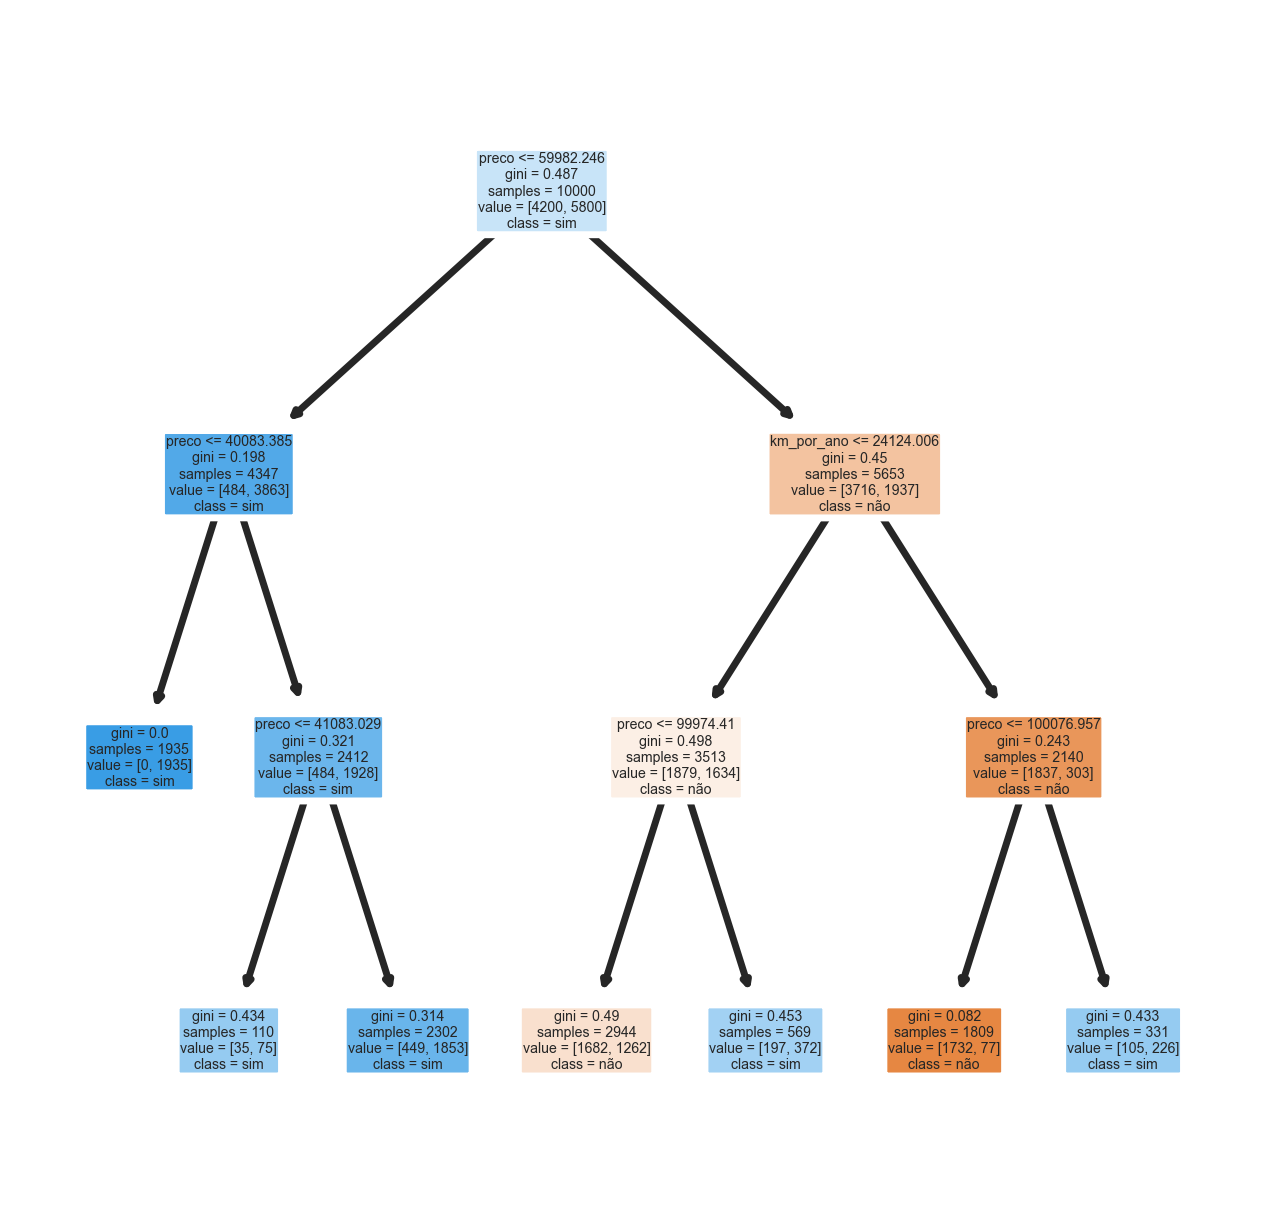

In [77]:
fig,ax=plt.subplots(figsize=(3,3),dpi=500)

plot_tree(melhor,class_names=['não','sim'],rounded=True,filled=True,feature_names=features)


# Customizando o espaço de parametro

In [94]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5,10,15,20,30,None],
    'min_samples_leaf':randint(32,128),
    'min_samples_split':randint(32,128),
    'criterion': ['gini','entropy']
    
}

busca=RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=10,shuffle=True),
                    random_state=SEED,
                    n_iter=16
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012204,0.000610,0.001203,0.000399,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.767,...,0.774,0.813,0.792,0.796,0.790,0.780,0.779,0.7870,0.013229,1
1,0.015609,0.000916,0.001699,0.000458,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.762,...,0.769,0.807,0.796,0.792,0.780,0.773,0.768,0.7787,0.014416,10
2,0.014641,0.000467,0.001408,0.000502,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.767,...,0.769,0.805,0.795,0.794,0.785,0.771,0.776,0.7826,0.012643,5
3,0.017901,0.001040,0.001699,0.000466,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,...,0.771,0.805,0.795,0.785,0.779,0.767,0.755,0.7745,0.015750,16
4,0.014216,0.000403,0.001584,0.000478,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.767,...,0.769,0.799,0.795,0.794,0.785,0.768,0.776,0.7819,0.011836,6


In [95]:
scores=cross_val_score(busca,x_azar,y_azar,cv=KFold(n_splits=10,shuffle=True))
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.18, 81.20]


In [96]:
melhor=busca.best_estimator_
melhor

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)

In [97]:
resultados_ordenados_pela_media=resultados.sort_values('mean_test_score',ascending=False)
resultados_ordenados_pela_media
for indices,linha in resultados_ordenados_pela_media.iterrows():
    print(round(linha.mean_test_score,3),'+-(',round(linha.std_test_score*2,3),')',linha.params)

0.787 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.785 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.783 +-( 0.025 ) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.783 +-( 0.025 ) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.782 +-( 0.024 ) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.781 +-( 0.023 ) {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.781 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.78 +-( 0.024 ) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 88, 'min_samples_split': 78}
0.779 +-( 0.029 ) {'criterion': 'gi

# Exploração de um domínio maior (aleatório)

In [98]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5,10,15,20,30,None],
    'min_samples_leaf':randint(32,128),
    'min_samples_split':randint(32,128),
    'criterion': ['gini','entropy']
    
}

busca=RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=10,shuffle=True),
                    random_state=SEED,
                    n_iter=64
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012318,0.000646,0.001906,0.000304,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.767,...,0.774,0.813,0.792,0.796,0.790,0.780,0.779,0.7870,0.013229,1
1,0.015601,0.000915,0.001400,0.000489,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.762,...,0.769,0.807,0.796,0.792,0.780,0.773,0.768,0.7787,0.014416,42
2,0.015356,0.001005,0.001597,0.000494,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.767,...,0.769,0.805,0.795,0.794,0.785,0.771,0.776,0.7826,0.012643,19
3,0.018553,0.001022,0.001613,0.000651,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,...,0.771,0.805,0.795,0.785,0.779,0.767,0.755,0.7745,0.015750,58
4,0.014959,0.000123,0.001602,0.000490,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.767,...,0.769,0.799,0.795,0.794,0.785,0.768,0.776,0.7819,0.011836,22


In [99]:
resultados_ordenados_pela_media=resultados.sort_values('mean_test_score',ascending=False)
resultados_ordenados_pela_media
for indices,linha in resultados_ordenados_pela_media.iterrows():
    print(round(linha.mean_test_score,3),'+-(',round(linha.std_test_score*2,3),')',linha.params)

0.787 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +-( 0.026 ) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +-( 0.026 ) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.786 +-( 0.027 ) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 111, 'min_samples_split': 94}
0.785 +-( 0.026 ) {'criterion': 'gin

In [100]:
scores=cross_val_score(busca,x_azar,y_azar,cv=KFold(n_splits=10,shuffle=True))
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.40, 80.98]


In [102]:
melhor=busca.best_estimator_
melhor

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)

# Comparação GRIDSEARCHVC e RANDOMIZESEARCH

In [106]:
from sklearn.ensemble import RandomForestClassifier
import time
SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5,10,15,20,30,None],
    'min_samples_leaf':[32,64,128],
    'min_samples_split':[32,64,128],
    'criterion': ['gini','entropy'],
    'n_estimators':[10,100],
    'bootstrap':[True,False], 
}

tic=time.time()
busca=GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=5,shuffle=True),
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
tac=time.time()
tempo_passado=tac-tic
print('tempo que demorou %.2f s'%tempo_passado )
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

tempo que demorou 976.69 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031511,0.005562,0.004419,0.000474,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,491
1,0.266904,0.005918,0.023521,0.000581,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,418
2,0.029200,0.000750,0.004001,0.000002,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,405
3,0.267346,0.002374,0.023994,0.000013,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,466
4,0.029157,0.001554,0.004330,0.000570,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,496


In [107]:
SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':[3,5,10,15,20,30,None],
    'min_samples_leaf':[32,64,128],
    'min_samples_split':[32,64,128],
    'criterion': ['gini','entropy'],
    'n_estimators':[10,100],
    'bootstrap':[True,False], 
}

tic=time.time()
busca=RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=5,shuffle=True),
                    n_iter=20
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
tac=time.time()
tempo_passado=tac-tic
print('tempo que demorou %.2f s'%tempo_passado )
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

tempo que demorou 50.89 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.606453,0.015767,0.028010,0.003030,100,64,64,5,entropy,False,"{'n_estimators': 100, 'min_samples_split': 64,...",0.7740,0.7740,0.7835,0.7840,0.7630,0.7757,0.007705,11
1,0.037810,0.000747,0.004998,0.000005,10,128,128,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7720,0.7445,0.7740,0.7450,0.7630,0.7597,0.012758,20
2,0.065758,0.002432,0.006200,0.000382,10,32,128,10,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7685,0.7675,0.7800,0.7825,0.7475,0.7692,0.012392,18
3,0.706042,0.026054,0.042393,0.004123,100,128,64,10,entropy,True,"{'n_estimators': 100, 'min_samples_split': 128...",0.7790,0.7690,0.7875,0.7835,0.7630,0.7764,0.009107,8
4,0.569272,0.020607,0.034548,0.000843,100,128,128,20,entropy,True,"{'n_estimators': 100, 'min_samples_split': 128...",0.7710,0.7705,0.7820,0.7835,0.7620,0.7738,0.007991,16


In [108]:
resultados_ordenados_pela_media=resultados.sort_values('mean_test_score',ascending=False)
resultados_ordenados_pela_media
for indices,linha in resultados_ordenados_pela_media.iterrows():
    print(round(linha.mean_test_score,3),'+-(',round(linha.std_test_score*2,3),')',linha.params)

0.783 +-( 0.018 ) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
0.781 +-( 0.018 ) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
0.78 +-( 0.024 ) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}
0.779 +-( 0.021 ) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
0.779 +-( 0.019 ) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
0.778 +-( 0.021 ) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
0.777 +-( 0.012 ) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 30, 'crit

In [109]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 139.89 segundos
Accuracy médio 77.89
Intervalo [74.79, 80.99]
RandomForestClassifier(max_depth=30, min_samples_leaf=32, min_samples_split=32)


In [111]:
SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':randint(3,6),
    'min_samples_leaf':randint(32,129),
    'min_samples_split':randint(32,129),
    'criterion': ['gini','entropy'],
    'n_estimators':randint(10,101),
    'bootstrap':[True,False], 
}

tic=time.time()
busca=RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv=KFold(n_splits=5,shuffle=True),
                    n_iter=80
                    )
busca.fit(x_azar,y_azar,groups=dados.modelo)
tac=time.time()
tempo_passado=tac-tic
print('tempo que demorou %.2f s'%tempo_passado )
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

tempo que demorou 99.91 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.283238,0.009181,0.021926,0.000754,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.250001,0.023148,0.022393,0.002069,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.259855,0.007012,0.024006,0.000904,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.171224,0.001893,0.016412,0.000496,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.254758,0.003818,0.021403,0.000499,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [113]:
resultados_ordenados_pela_media=resultados.sort_values('mean_test_score',ascending=False)
resultados_ordenados_pela_media
for indices,linha in resultados_ordenados_pela_media.iterrows():
    print(round(linha.mean_test_score,3),'+-(',round(linha.std_test_score*2,3),')',linha.params)

0.779 +-( 0.025 ) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-( 0.031 ) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-( 0.032 ) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.778 +-( 0.024 ) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-( 0.029 ) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}
0.777 +-( 0.035 ) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 35, 'min_samples_split': 125, 'n_estimators': 12}
0.777 +-( 0.026 ) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split

# sem usar o cross validation

In [117]:
from sklearn.model_selection import train_test_split
x_treino_teste,x_validacao,y_treino_teste,y_validacao=train_test_split(x_azar,y_azar,test_size=0.2,shuffle=True,stratify=y_azar)
print(x_treino_teste.shape,x_validacao.shape)

(8000, 3) (2000, 3)


In [125]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED=301
np.random.seed(SEED)
espaco_de_parametros={
    'max_depth':randint(3,6),
    'min_samples_leaf':randint(32,129),
    'min_samples_split':randint(32,129),
    'criterion': ['gini','entropy'],
    'n_estimators':randint(10,101),
    'bootstrap':[True,False], 
}

split=StratifiedShuffleSplit(n_splits=1,test_size=0.25)

tic=time.time()
busca=RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv=split,
                    n_iter=5
                    )
busca.fit(x_treino_teste,y_treino_teste)
tac=time.time()

tempo_passado=tac-tic
print('tempo que demorou %.2f s'%tempo_passado )
resultados=pd.DataFrame(busca.cv_results_)
resultados.head()

tempo que demorou 1.21 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.231111,0.0,0.021000,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7750,0.7750,0.0,3
1,0.188001,0.0,0.020000,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7755,0.0,1
2,0.178966,0.0,0.020002,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,3
3,0.120039,0.0,0.012994,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7755,0.0,1
4,0.173234,0.0,0.019001,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,5


In [128]:
tic = time.time()
scores = cross_val_score(busca,x_validacao , y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 0.40 segundos
Accuracy médio 78.60
Intervalo [78.60, 78.60]
RandomForestClassifier(max_depth=3, min_samples_leaf=88, min_samples_split=104,
                       n_estimators=80)
